## Presentation générale de l'édition des JO

### Contexte de l'Édition

Les Jeux Olympiques d'hiver de 1992, officiellement connus sous le nom de XVIes Jeux Olympiques d'hiver, 
se sont déroulés à Albertville, en France, du 8 au 23 février 1992. C'était la première fois que la ville 
d'Albertville accueillait les Jeux, bien que la France ait déjà été l'hôte des Jeux Olympiques d'hiver en 1924 
à Chamonix et en 1968 à Grenoble.

### Localisation

Les Jeux se sont tenus dans plusieurs villages et petites villes de la région de la Savoie, 
dans les Alpes françaises, plutôt que dans un seul site centralisé. Cette dispersion a nécessité la création 
de plusieurs villages olympiques pour héberger les athlètes et les délégations. 


In [46]:
import folium

latitude = 45.6755
longitude = 6.3905

map_albertville = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Marker([latitude, longitude], popup='Albertville').add_to(map_albertville)

map_albertville


### Statistiques et Événements

Participants : 1801(2034 avec la requete) athlètes de 64 pays

Épreuves : 57 épreuves dans 12 disciplines

Nouvelles Épreuves et Sports : Pour la première fois, les femmes ont participé au biathlon. 
Le patinage de vitesse sur piste courte (short-track) a été introduit pour les hommes et les femmes. 
Le ski acrobatique (freestyle skiing), après avoir été un sport de démonstration en 1988, a inclus les moguls 
comme épreuve avec médailles.

Épreuves de Démonstration : Le ski de vitesse et les autres disciplines du ski acrobatique, comme le ballet 
et les sauts acrobatiques (aerials), ont été des épreuves de démonstration.

### Répartition par Genre

Les épreuves des Jeux Olympiques d'hiver de 1992 ont compris des compétitions masculines, féminines et mixtes 
dans différentes disciplines. Voici un aperçu de la répartition :

Épreuves masculines : Ski alpin, biathlon, bobsleigh, combiné nordique, curling (démonstration), hockey sur 
glace, luge, patinage artistique, patinage de vitesse, saut à ski, ski de fond.
Épreuves féminines : Ski alpin, biathlon, curling (démonstration), luge, patinage artistique, patinage de 
vitesse, ski de fond.
Épreuves mixtes : Patinage artistique (danse sur glace), relais mixte en biathlon.

### Faits Marquants

Nouveaux Pays Participants : La réunification de l'Allemagne a permis à l'équipe allemande de concourir comme une seule nation pour la première fois depuis 1936. Les États baltes (Estonie, Lettonie, et Lituanie) ont participé pour la première fois depuis 1936. La Croatie et la Slovénie, nouvellement indépendantes, ont fait leur première apparition. 
L'ancienne Union Soviétique a été représentée par l'Équipe unifiée.

Performances Notables :
Ski de fond : Yelena Välbe et Lyubov Yegorova de l'Équipe unifiée ont remporté cinq médailles chacune. Vegard Ulvang et Bjørn Dæhlie de Norvège ont également dominé, avec quatre médailles chacun.
Patinage de vitesse : Bonnie Blair des États-Unis a remporté les deux sprints féminins, tandis que Gunda Niemann d'Allemagne a gagné les deux épreuves de fond.

In [47]:
!pip install folium
!pip install cx_Oracle
!pip install --upgrade oracledb

In [1]:
# Compléter ici les imports dont vous avez besoin, ne pas modifier ceux déjà présents
import getpass
from os import getenv
import pandas as pd
import oracledb
import warnings
import matplotlib.pyplot as plt

In [2]:
# Nécessaire pour éviter les problèmes de session
class Connexion(object):
    def __init__(self, login, password):
        self.conn = oracledb.connect(
            user=login,
            password=password,
            host="oracle.iut-orsay.fr",
            port=1521,
            sid="etudom",
        )
        self.conn.autocommit = False

    def __enter__(self):
        self.conn.autocommit = False
        return self.conn

    def __exit__(self, *args):
        self.conn.close()

In [3]:
# La fonction ci-dessous est à utiliser pour exécuter une requête et stocker les résultats dans un dataframe Pandas sans afficher d’alerte.
# Vous pouvez vous en inspirer pour créer vos propres fonctions.
def requete_vers_dataframe(connexion_data, requete, valeurs = None):
    with Connexion(login=connexion_data['login'], password=connexion_data['password']) as connexion:
        warnings.simplefilter(action='ignore', category=UserWarning)
        if valeurs is not None:
            df = pd.read_sql(requete, connexion, params=valeurs)
        else:
            df = pd.read_sql(requete, connexion)
        warnings.simplefilter("always") 
        return df

In [4]:
# Saisir ci-dessous l'édition des JO qui vous a été attribuée. Cela correspond au LibelleHote dans la table HOTE de la base de données
# Par exemple EDITION_JO = "2020 Summer Olympics"
EDITION_JO = "1992 Winter Olympics"
# Saisir ci-dessous le login court de la base utilisée pour votre carnet
SCHEMA = "NKASSIM"

In [5]:
# On demande à l'utilisateur son login et mot de passe pour pouvoir accéder à la base de données
if getenv("DB_LOGIN") is None:
    login = input("Login : ")
else:
    login = getenv("DB_LOGIN")
if getenv("DB_PASS") is None:
    password = getpass.getpass("Mot de passe : ")
else:
    password = getenv("DB_PASS")
conn = {'login': login, 'password': password}

Login :  nkassim
Mot de passe :  ········


In [8]:
# On vérifie que l'utilisateur est bien connecté à la base de données et qu'on trouve la bonne édition des JO
data = requete_vers_dataframe(conn, f"SELECT * FROM {SCHEMA}.HOTE WHERE LibelleHote LIKE (:libelle)",{"libelle":EDITION_JO})
id_hote = int(data.IDHOTE.iloc[0])
print(f"Identifiant de l’hôte : {id_hote}")

Identifiant de l’hôte : 44


In [ ]:
ancienne version de connexion en bas A FAIRE 

In [6]:
import getpass
from os import getenv
import pandas as pd
import oracledb
import warnings
import matplotlib.pyplot as plt
def requete_vers_dataframe(connexion, requete, valeurs = None):
    warnings.simplefilter(action='ignore', category=UserWarning)
    if valeurs is not None:
        df = pd.read_sql(requete, connexion, params=valeurs)
    else:
        df = pd.read_sql(requete, connexion)
    warnings.simplefilter("always") 
    return df
# Saisir ci-dessous l'édition des JO qui vous a été attribuée. Cela correspond au LibelleHote dans la table HOTE de la base de données
# Par exemple EDITION_JO = "2020 Summer Olympics"
EDITION_JO = "1992 Winter Olympics"
# Saisir ci-dessous le login court de la base utilisée pour votre carnet
SCHEMA = "NKASSIM"

In [7]:
# On demande à l'utilisateur son login et mot de passe pour pouvoir accéder à la base de données
if getenv("DB_LOGIN") is None:
    login = input("Login : ")
else:
    login = getenv("DB_LOGIN")
if getenv("DB_PASS") is None:
    password = getpass.getpass("Mot de passe : ")
else:
    password = getenv("DB_PASS_PASS")
conn = oracledb.connect(user=login, password=password, host="oracle.iut-orsay.fr", port=1521, sid="etudom")
conn.autocommit = False

Login :  nkassim
Mot de passe :  ········


### a.Les épreuves, sports/catégories présents

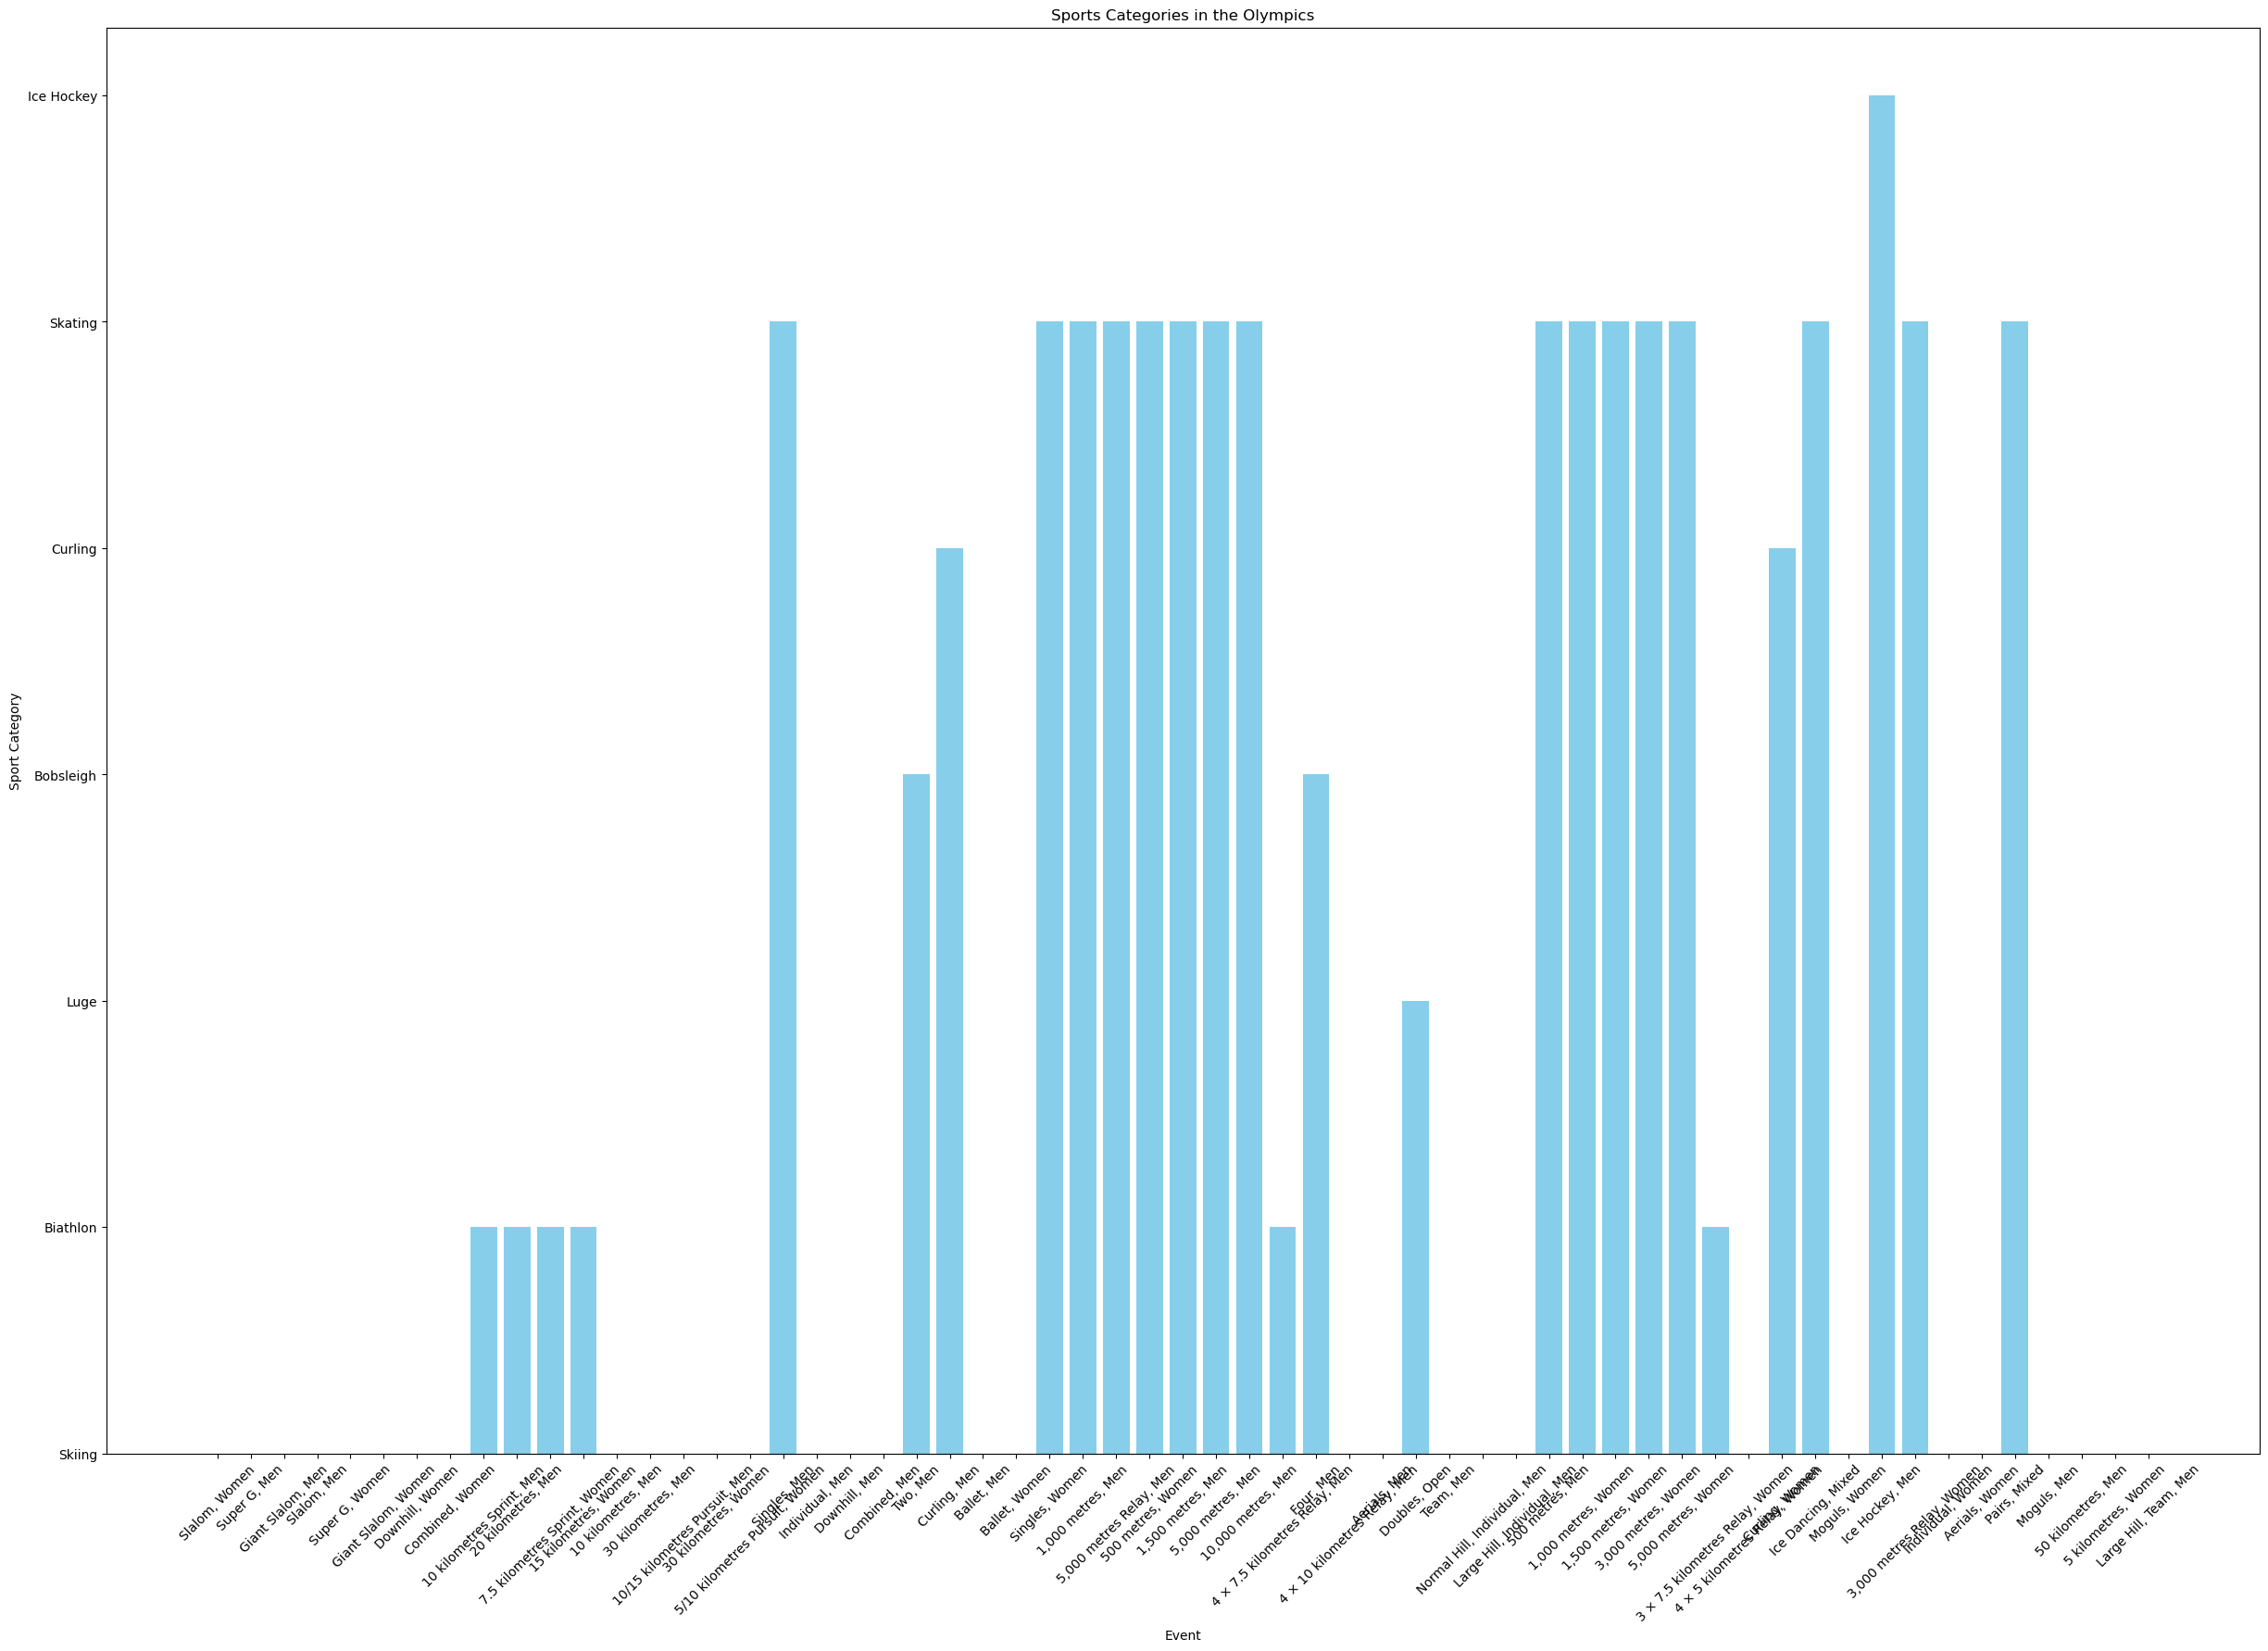

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

def execute_query(conn, query):
    try:
        cursor = conn.cursor()
        cursor.execute(query)
        columns = [col[0] for col in cursor.description]
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=columns)
        cursor.close()
        return df
    except Exception as e:
        print(f"Error executing query: {str(e)}")
        return None

if conn:
    query_events = f"""
        SELECT 
            e.nomevenement AS Event,
            s.nomsport AS Sport
        FROM 
            {SCHEMA}.discipline d
        JOIN
            {SCHEMA}.evenement e ON e.codediscipline = d.codediscipline
        JOIN
            {SCHEMA}.hote h ON h.idhote = e.idhote
        JOIN 
            {SCHEMA}.sport s ON d.codesport = s.codesport
        WHERE 
            h.libellehote = '1992 Winter Olympics'
    """



    df_events = execute_query(conn, query_events)
   
    if df_events is not None and not df_events.empty:
        plt.figure(figsize=(30, 20))
        plt.bar(df_events['EVENT'], df_events['SPORT'], color='skyblue')
        plt.xlabel('Event')
        plt.ylabel('Sport Category')
        plt.title('Sports Categories in the Olympics')
        plt.xticks(rotation=45)
        plt.show()
        plt.pause(0.9)
    else:
        print("error sur categorie")


#### Voici la liste des événements des Jeux Olympiques d'hiver de 1992, classée par sport

Skiing
Slalom, Women
Super G, Men
Giant Slalom, Men
Slalom, Men
Super G, Women
Giant Slalom, Women
Downhill, Women
Combined, Women
10 kilometres, Men
30 kilometres, Men
10/15 kilometres Pursuit, Men
15 kilometres, Women
30 kilometres, Women
5/10 kilometres Pursuit, Women
Individual, Men
Downhill, Men
Combined, Men
Ballet, Men
Ballet, Women
4 × 10 kilometres Relay, Men
Aerials, Men
Team, Men
Normal Hill, Individual, Men
Large Hill, Individual, Men
4 × 5 kilometres Relay, Women
Moguls, Women
Individual, Women
Aerials, Women
Moguls, Men
50 kilometres, Men
5 kilometres, Women
Large Hill, Team, Men
Individual, Men
Individual, Men


Biathlon
10 kilometres Sprint, Men
20 kilometres, Men
7.5 kilometres Sprint, Women
15 kilometres, Women
4 × 7.5 kilometres Relay, Men
3 × 7.5 kilometres Relay, Women


Bobsleigh
Two, Men
Four, Men


Curling
Curling, Men
Curling, Women


Luge
Singles, Men
Singles, Women
Doubles, Open


Skating
Singles, Men
1,000 metres, Men
5,000 metres Relay, Men
500 metres, Women
1,000 metres, Men
1,500 metres, Men
5,000 metres, Men
10,000 metres, Men
500 metres, Men
1,000 metres, Women
1,500 metres, Women
3,000 metres, Women
5,000 metres, Women
Singles, Women
Ice Dancing, Mixed
3,000 metres Relay, Women
500 metres, Women
Pairs, Mixed

Ice Hockey
Ice Hockey, Men

Ces événements montrent la diversité des compétitions présentes aux Jeux Olympiques d'hiver de 1992, illustrant l'importance croissante des sports d'hiver et l'élargissement de la participation, notamment pour les femmes.








### b.Répartition par sexe des athlètes de cette édition (Winter 1992)

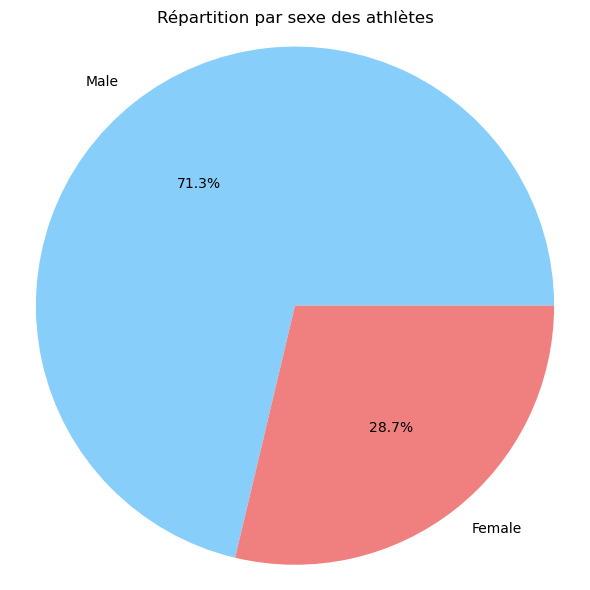

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

def execute_query(conn, query):
    try:
        cursor = conn.cursor()
        cursor.execute(query)
        columns = [col[0] for col in cursor.description]
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=columns)
        cursor.close()
        return df
    except Exception as e:
        print(f"Error executing query: {str(e)}")
        return None

if conn:
    query_gender_distribution = f"""
        SELECT 
            a.genre AS Gender,
            COUNT(DISTINCT a.idathlete) AS Count
        FROM 
            {SCHEMA}.athlete a
        LEFT JOIN 
            {SCHEMA}.participation_individuelle pi ON pi.idathlete = a.idathlete
        LEFT JOIN 
            {SCHEMA}.evenement e_ind ON e_ind.idevenement = pi.idevent
        LEFT JOIN 
            {SCHEMA}.composition_equipe ce ON ce.idathlete = a.idathlete
        LEFT JOIN 
            {SCHEMA}.participation_equipe pe ON pe.idequipe = ce.idequipe
        LEFT JOIN 
            {SCHEMA}.evenement e_team ON e_team.idevenement = pe.idevenement
        LEFT JOIN 
            {SCHEMA}.hote h_ind ON h_ind.idhote = e_ind.idhote
        LEFT JOIN 
            {SCHEMA}.hote h_team ON h_team.idhote = e_team.idhote
        WHERE
            (h_ind.libellehote = '1992 Winter Olympics' OR h_team.libellehote = '1992 Winter Olympics')
        GROUP BY 
            a.genre
    """


    
    df_gender_dist = execute_query(conn, query_gender_distribution)
   

    if df_gender_dist is not None and not df_gender_dist.empty:
        plt.figure(figsize=(6, 6))
        plt.pie(df_gender_dist['COUNT'], labels=df_gender_dist['GENDER'], autopct='%1.1f%%', colors=['lightskyblue','lightcoral'])
        plt.title('Répartition par sexe des athlètes')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
    else:
        print("error sur genre")

La répartition des athlètes aux Jeux Olympiques d'hiver de 1992 montre une prédominance masculine, avec 71,3 % des participants étant des hommes, tandis que les femmes représentaient les 28,7 % restants. Cette inégalité de genre peut être attribuée à plusieurs facteurs historiques, culturels et structurels. 

Historiquement, les sports d'hiver ont longtemps été dominés par les hommes, en partie à cause des normes sociales et des attentes culturelles qui limitaient l'accès des femmes à certaines disciplines sportives. Les infrastructures et les opportunités de formation pour les femmes étaient également moins développées, ce qui réduisait leur présence dans ces compétitions. Cependant, malgré cette répartition inégale en 1992, la participation féminine a montré une croissance significative au fil des années, comme en témoigne l'augmentation progressive du nombre d'athlètes féminines. 

Cette tendance reflète les efforts accrus pour promouvoir l'égalité des sexes dans le sport, ainsi que l'évolution des attitudes sociétales et l'amélioration des soutiens institutionnels pour les femmes dans les sports d'hiver.

## 2.Comparaison de cette édition avec les éditions qui l'ont précédée

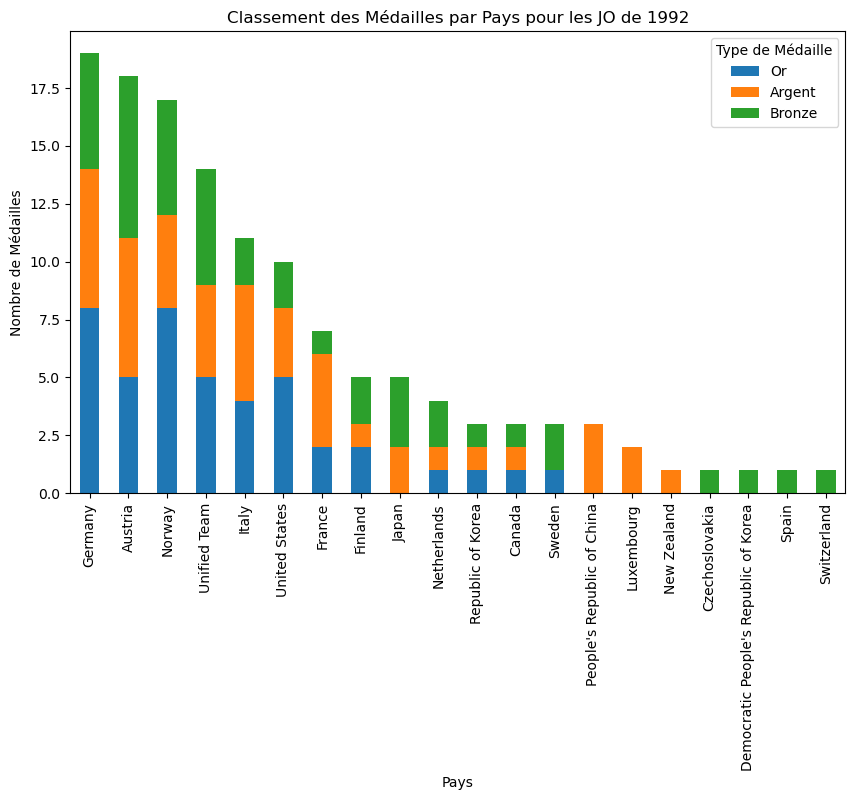

In [41]:
query_medals = f"""
SELECT
    n.NomNOC AS "Pays",
    SUM(CASE WHEN p.Medaille = 'Gold' THEN 1 ELSE 0 END) AS "Or",
    SUM(CASE WHEN p.Medaille = 'Silver' THEN 1 ELSE 0 END) AS "Argent",
    SUM(CASE WHEN p.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS "Bronze",
    COUNT(p.Medaille) AS "Total"
FROM PARTICIPATION_INDIVIDUELLE p
JOIN ATHLETE a ON p.IdAthlete = a.IdAthlete
JOIN EVENEMENT e ON p.IdEvent = e.IdEvenement
JOIN HOTE h ON e.IdHote = h.IdHote
JOIN NOC n ON p.NOC = n.CodeNOC
WHERE h.LibelleHote = '1992 Winter Olympics'
GROUP BY n.NomNOC
HAVING COUNT(p.Medaille) > 0
ORDER BY "Total" DESC, "Or" DESC, "Argent" DESC, "Bronze" DESC
"""

# Exécution
df_medals = requete_vers_dataframe(conn, query_medals)
df_medals[0:10]

# Visualisation des résultats
df_medals.set_index('Pays')[['Or', 'Argent', 'Bronze']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Classement des Médailles par Pays pour les JO de 1992')
plt.xlabel('Pays')
plt.ylabel('Nombre de Médailles')
plt.legend(title='Type de Médaille')
plt.show()

### a.classement des nations (tableau de classement pour les trois couleurs de médailles et pour le total), répartition des médailles par couleur et par pays.

Interprétation du Classement des Médailles par Pays aux Jeux Olympiques d'Hiver de 1992

Le graphique ci-dessus présente le classement des nations selon le nombre de médailles d'or, d'argent, et de bronze obtenues lors des Jeux Olympiques d'hiver de 1992. L'analyse des données révèle plusieurs points saillants qui méritent d'être discutés :

Dominance de l'Allemagne : L'Allemagne se distingue nettement, ayant remporté le plus grand nombre de médailles dans chaque catégorie, ce qui témoigne de sa suprématie et de son investissement conséquent dans les disciplines hivernales. Cette performance peut être attribuée à des infrastructures de formation et de compétition de premier plan, ainsi qu'à un système de soutien robuste pour les athlètes.

Forte représentation nordique et européenne : Les pays comme l'Autriche, la Norvège et l'Italie affichent également d'excellentes performances. Ces pays, bénéficiant de conditions climatiques et géographiques favorables aux sports d'hiver, continuent de dominer de nombreuses disciplines, confirmant ainsi leur réputation dans ces sports.

Diversité géographique des médaillés : Des pays moins traditionnels dans le contexte des sports d'hiver, tels que le Japon et la République de Corée, ont aussi réussi à obtenir des médailles, ce qui indique une progression et un développement significatifs dans leurs programmes sportifs.

Performances notables de pays non-dominants : La présence de pays comme la Nouvelle-Zélande et l'Espagne, qui ont réussi à remporter des médailles malgré une association moins évidente avec les sports d'hiver, souligne l'universalité et l'accessibilité croissante de ces sports.

Implications pour le développement futur : Les nations ayant obtenu peu ou pas de médailles peuvent examiner ces résultats pour réévaluer et potentiellement redynamiser leurs efforts dans les sports d'hiver. Pour les nations médaillées, ces succès offrent une plateforme pour renforcer la participation au niveau national et encourager la prochaine génération d'athlètes.

En conclusion, le graphique met en évidence non seulement les réussites des nations traditionnellement fortes en sports d'hiver mais aussi l'émergence de nouveaux compétiteurs sur la scène olympique. Ces résultats servent de baromètre pour mesurer l'efficacité des programmes nationaux de sports d'hiver et peuvent orienter les décisions futures en matière de développement sportif et de soutien aux athlètes.

### b.répartition des médailles par genre et par pays, comparaison à l'aide de la moyenne/écart-type et min/max/quartiles/médiane.

In [42]:
import pandas as pd
from sqlalchemy import create_engine
import cx_Oracle

if conn:
    try:
        cursor = conn.cursor()
        
        create_view_sql = """
            CREATE OR REPLACE VIEW MEDAILLES_NOC_GENRE AS
            WITH individual_medals AS (
                SELECT 
                    noc.codenoc AS noc,
                    athl.genre AS genre,
                    COALESCE(SUM(CASE WHEN pi.medaille = 'Gold' THEN 1 ELSE 0 END), 0) AS gold_medals,
                    COALESCE(SUM(CASE WHEN pi.medaille = 'Silver' THEN 1 ELSE 0 END), 0) AS silver_medals,
                    COALESCE(SUM(CASE WHEN pi.medaille = 'Bronze' THEN 1 ELSE 0 END), 0) AS bronze_medals
                FROM 
                    noc
                LEFT JOIN 
                    participation_individuelle pi ON pi.noc = noc.codenoc
                LEFT JOIN
                    athlete athl ON athl.idathlete = pi.idathlete
                GROUP BY 
                    noc.codenoc, athl.genre
            ),
            team_medals AS (
                SELECT 
                    noc.codenoc AS noc,
                    athl.genre AS genre,
                    COALESCE(SUM(CASE WHEN pe.medaille = 'Gold' THEN 1 ELSE 0 END), 0) AS gold_medals,
                    COALESCE(SUM(CASE WHEN pe.medaille = 'Silver' THEN 1 ELSE 0 END), 0) AS silver_medals,
                    COALESCE(SUM(CASE WHEN pe.medaille = 'Bronze' THEN 1 ELSE 0 END), 0) AS bronze_medals
                FROM 
                    noc
                LEFT JOIN 
                    equipe e ON e.noc = noc.codenoc
                LEFT JOIN 
                    participation_equipe pe ON e.idequipe = pe.idequipe
                LEFT JOIN
                    composition_equipe ce ON ce.idequipe = e.idequipe
                LEFT JOIN
                    athlete athl ON athl.idathlete = ce.idathlete
                GROUP BY 
                    noc.codenoc, athl.genre
            )
            SELECT 
                n.codenoc AS country,
                COALESCE(im.genre, tm.genre) AS genre,
                COALESCE(im.gold_medals, 0) + COALESCE(tm.gold_medals, 0) AS Gold,
                COALESCE(im.silver_medals, 0) + COALESCE(tm.silver_medals, 0) AS Silver,
                COALESCE(im.bronze_medals, 0) + COALESCE(tm.bronze_medals, 0) AS Bronze,
                COALESCE(im.gold_medals, 0) + COALESCE(tm.gold_medals, 0) + 
                COALESCE(im.silver_medals, 0) + COALESCE(tm.silver_medals, 0) + 
                COALESCE(im.bronze_medals, 0) + COALESCE(tm.bronze_medals, 0) AS Total
            FROM 
                noc n
            LEFT JOIN 
                individual_medals im ON n.codenoc = im.noc
            LEFT JOIN 
                team_medals tm ON n.codenoc = tm.noc
        """

        cursor.execute(create_view_sql)
        conn.commit()
        
        #grant 

        print("la vue MEDAILLES_NOC_GENRE a été créée avec sucès")
        
        #grant select, update, insert, delete on MEDAILLES_NOC_GENRE to GestionJO;
        #grant select, update, insert, delete on MEDAILLES_NOC_GENRE to AnalyseJO;
        
        
        query = "SELECT * FROM MEDAILLES_NOC_GENRE"
        cursor.execute(query)
        columns = [col[0] for col in cursor.description]
        data = cursor.fetchall()
        df_medals = pd.DataFrame(data, columns=columns)

        if not df_medals.empty:
        
            df_medals['Gold%'] = df_medals['GOLD'] / df_medals['TOTAL'] * 100
            df_medals['Silver%'] = df_medals['SILVER'] / df_medals['TOTAL'] * 100
            df_medals['Bronze%'] = df_medals['BRONZE'] / df_medals['TOTAL'] * 100

            grouped = df_medals.groupby(['COUNTRY', 'GENRE'])

            statistics = grouped.agg(['mean', 'std', 'min', 'max', 'median', 'quantile'])
            quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack(level=-1)

            stats_summary = pd.concat([statistics, quartiles], axis=1)

            print("Statistiques：")
            display(stats_summary)

        else:
            print("vide")

    except Exception as e:
        print(f"error：{str(e)}")

    finally:
        cursor.close()   
else:
    print("error de connection")
    
 


la vue MEDAILLES_NOC_GENRE a été créée avec sucès
Statistiques：


GOLD                                     SILVER             \
                mean        std min  max median quantile   mean        std   
COUNTRY GENRE                                                                
AFG     Female   0.0        NaN   0    0    0.0      0.0    0.0        NaN   
        Male     0.0        NaN   0    0    0.0      0.0    0.0        NaN   
AHO     Female   0.0   0.000000   0    0    0.0      0.0    0.0   0.000000   
        Male     0.0   0.000000   0    0    0.0      0.0    1.0   0.000000   
ALB     Female   0.0        NaN   0    0    0.0      0.0    0.0        NaN   
...              ...        ...  ..  ...    ...      ...    ...        ...   
YUG     Male    73.5  62.932504  29  118   73.5     73.5  101.5  86.974134   
ZAM     Female   0.0   0.000000   0    0    0.0      0.0    0.0   0.000000   
        Male     0.0   0.000000   0    0    0.0      0.0    1.0   0.000000   
ZIM     Female  10.0  11.313708   2   18   10.0     10.0    4.0   0.000000   
        Male     8.0  11.313708   0   16    8.0      8.0    0.0   0.000000   

                         ...   TOTAL       Gold%                          \
               min  max  ...    0.75        0.25         0.5        0.75   
COUNTRY GENRE            ...                                               
AFG     Female   0    0  ...    0.00         NaN         NaN         NaN   
        Male     0    0  ...    2.00    0.000000    0.000000    0.000000   
AHO     Female   0    0  ...    0.00         NaN         NaN         NaN   
        Male     1    1  ...    1.00    0.000000    0.000000    0.000000   
ALB     Female   0    0  ...    0.00         NaN         NaN         NaN   
...             ..  ...  ...     ...         ...         ...         ...   
YUG     Male    40  163  ...  294.75   29.540800   30.650227   31.759654   
ZAM     Female   0    0  ...    0.00         NaN         NaN         NaN   
        Male     1    1  ...    2.00    0.000000    0.000000    0.000000   
ZIM     Female   4    4  ...   19.00   40.993789   53.416149   65.838509   
        Male     0    0  ...   12.00  100.000000  100.000000  100.000000   

                   Silver%                             Bronze%             \
                      0.25         0.5        0.75        0.25        0.5   
COUNTRY GENRE                                                               
AFG     Female         NaN         NaN         NaN         NaN        NaN   
        Male      0.000000    0.000000    0.000000  100.000000  100.00000   
AHO     Female         NaN         NaN         NaN         NaN        NaN   
        Male    100.000000  100.000000  100.000000    0.000000    0.00000   
ALB     Female         NaN         NaN         NaN         NaN        NaN   
...                    ...         ...         ...         ...        ...   
YUG     Male     40.762740   42.309793   43.856846   24.383500   27.03998   
ZAM     Female         NaN         NaN         NaN         NaN        NaN   
        Male     50.000000   50.000000   50.000000   50.000000   50.00000   
ZIM     Female   27.329193   37.267081   47.204969    6.832298    9.31677   
        Male      0.000000    0.000000    0.000000    0.000000    0.00000   

                            
                      0.75  
COUNTRY GENRE               
AFG     Female         NaN  
        Male    100.000000  
AHO     Female         NaN  
        Male      0.000000  
ALB     Female         NaN  
...                    ...  
YUG     Male     29.696461  
ZAM     Female         NaN  
        Male     50.000000  
ZIM     Female   11.801242  
        Male      0.000000  

[454 rows x 63 columns]

### b.répartition des médailles par genre et par pays

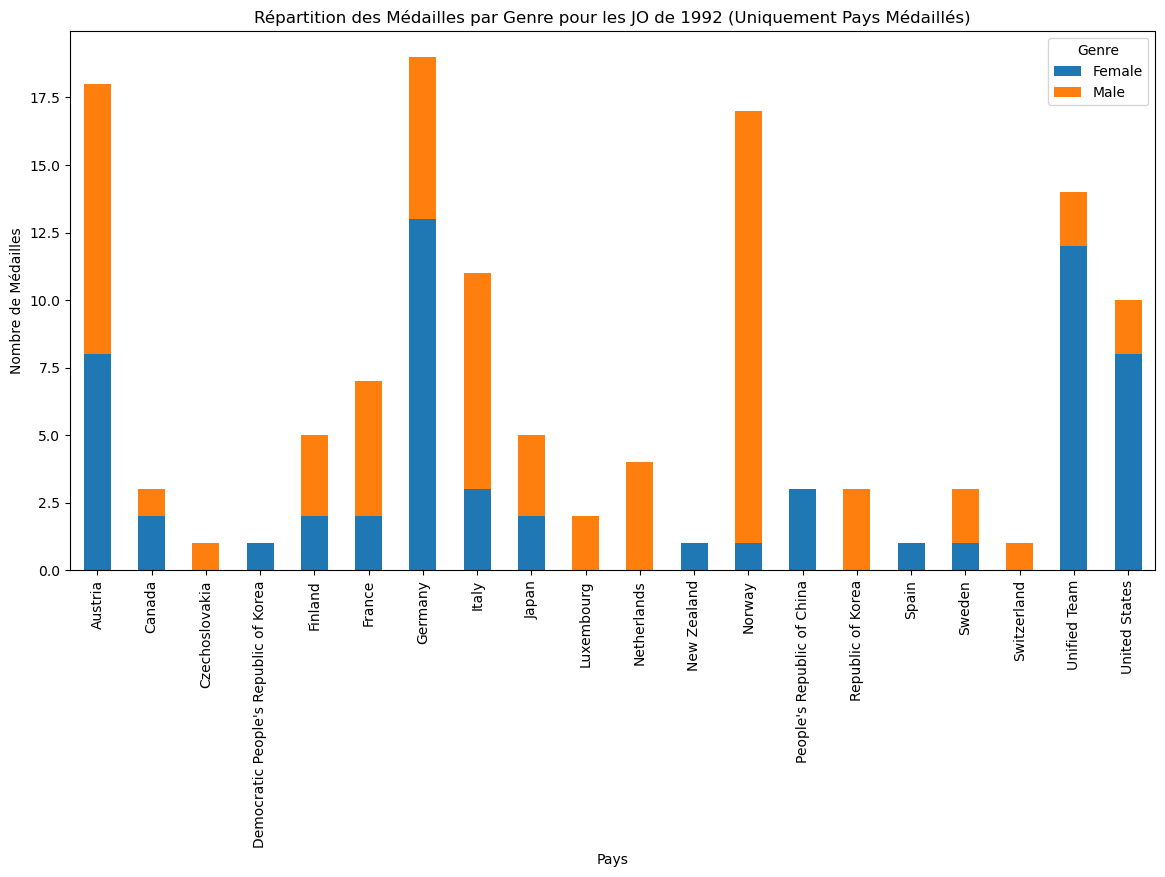

In [43]:
import pandas as pd
from sqlalchemy import create_engine
import cx_Oracle

query_medaille_genre = f"""
SELECT
    n.NomNOC AS "Pays",
    a.Genre AS "GENRE",
    SUM(CASE WHEN p.Medaille = 'Gold' THEN 1 ELSE 0 END) AS "Or",
    SUM(CASE WHEN p.Medaille = 'Silver' THEN 1 ELSE 0 END) AS "Argent",
    SUM(CASE WHEN p.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS "Bronze",
    COUNT(p.Medaille) AS "Total"
FROM PARTICIPATION_INDIVIDUELLE p
JOIN ATHLETE a ON p.IdAthlete = a.IdAthlete
JOIN EVENEMENT e ON p.IdEvent = e.IdEvenement
JOIN HOTE h ON e.IdHote = h.IdHote
JOIN NOC n ON p.NOC = n.CodeNOC
WHERE h.LibelleHote = '1992 Winter Olympics'
GROUP BY n.NomNOC, a.Genre
HAVING COUNT(p.Medaille) > 0
ORDER BY n.NomNOC, "Total" DESC
"""

df_medaille_genre = requete_vers_dataframe(conn, query_medaille_genre)


pivot_df = df_medaille_genre.pivot_table(index='Pays', columns='GENRE', values='Total', aggfunc='sum', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Répartition des Médailles par Genre pour les JO de 1992 (Uniquement Pays Médaillés)')
plt.xlabel('Pays')
plt.ylabel('Nombre de Médailles')
plt.legend(title='Genre')
plt.show()




Interprétation de la Répartition des Médailles par Genre aux Jeux Olympiques d'Hiver de 1992

Ce graphique présente une analyse détaillée de la répartition des médailles par genre pour les pays médaillés lors des Jeux Olympiques d'hiver de 1992. Il permet d'identifier les disparités entre les performances masculines et féminines et offre un aperçu des dynamiques de genre dans le contexte sportif international.

Observations Clés
Dominance Masculine :

Une majorité des pays, y compris des nations sportives puissantes comme l'Allemagne et la Norvège, montrent une prépondérance de médailles obtenues par les hommes. Cette tendance souligne la continuité des disparités de genre dans l'accès et le soutien aux sports d'hiver.
Équilibre de Genre :

Certains pays comme les États-Unis et l'Allemagne affichent une distribution plus équilibrée des médailles entre les genres, reflétant potentiellement des politiques sportives plus inclusives et des programmes de soutien équilibrés pour les athlètes féminines et masculines.
Performances Féminines Notables :

Des pays comme la République Populaire de Chine et, dans une moindre mesure, la France, montrent des performances remarquables des athlètes féminines, indiquant une possible évolution des normes et des opportunités pour les femmes dans les sports d'hiver.
Implications et Perspectives
Politiques de Soutien : Les données suggèrent un besoin continu d'initiatives ciblées pour soutenir les athlètes féminines dans les sports d'hiver. Les comités olympiques et les fédérations sportives peuvent envisager d'augmenter le financement et les ressources allouées aux programmes féminins pour réduire les disparités existantes.

Promotion de l'Égalité des Genres : Ces résultats devraient encourager les organisations sportives à promouvoir activement l'égalité des genres et à mettre en œuvre des stratégies pour une participation plus équilibrée. Cela pourrait inclure la création de compétitions et de formations spécifiques pour encourager une participation accrue des femmes.

Conclusion
L'analyse de la répartition des médailles par genre aux Jeux Olympiques d'hiver de 1992 met en lumière à la fois les succès et les défis en matière d'équité des genres dans le sport. Elle sert de rappel que, bien que des progrès aient été réalisés, il reste encore beaucoup à faire pour atteindre une véritable égalité dans le domaine sportif. En s'appuyant sur ces données, les décideurs peuvent mieux orienter leurs efforts pour soutenir et promouvoir les talents féminins dans l'arène internationale.

### c.évolution à long terme pour le top 3 de cette édition (c’est-à-dire que pour les trois meilleurs pays de cette édition, on veut savoir quelle était leur performance sur les jeux de même type (jeux d’été ou jeux d’hiver) lors des éditions qui ont précédé). 

   ANNEE     PAYS  TOTAL_MEDAILLES
0   1924  Austria                2
1   1924   Norway               17
2   1928  Austria                2
3   1928  Germany                0
4   1928   Norway               15


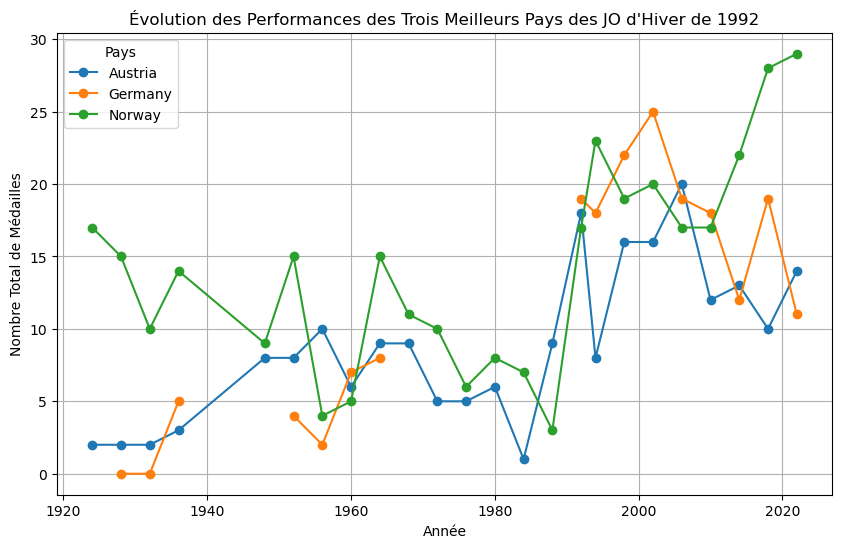

In [44]:
query_PERFORMANCE = f"""
SELECT
    h.AnneeHote AS ANNEE,
    n.NomNOC AS PAYS,
    COUNT(p.Medaille) AS TOTAL_MEDAILLES
FROM PARTICIPATION_INDIVIDUELLE p
JOIN ATHLETE a ON p.IdAthlete = a.IdAthlete
JOIN EVENEMENT e ON p.IdEvent = e.IdEvenement
JOIN HOTE h ON e.IdHote = h.IdHote
JOIN NOC n ON p.NOC = n.CodeNOC
WHERE n.NomNOC IN (
    SELECT Pays
    FROM (
        SELECT
            n.NomNOC AS Pays,
            SUM(CASE WHEN p.Medaille = 'Gold' THEN 1 ELSE 0 END) +
            SUM(CASE WHEN p.Medaille = 'Silver' THEN 1 ELSE 0 END) +
            SUM(CASE WHEN p.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Total_Medailles
        FROM PARTICIPATION_INDIVIDUELLE p
        JOIN ATHLETE a ON p.IdAthlete = a.IdAthlete
        JOIN EVENEMENT e ON p.IdEvent = e.IdEvenement
        JOIN HOTE h ON e.IdHote = h.IdHote
        JOIN NOC n ON p.NOC = n.CodeNOC
        WHERE h.LibelleHote = '1992 Winter Olympics'
        GROUP BY n.NomNOC
        ORDER BY Total_Medailles DESC
        FETCH FIRST 3 ROWS ONLY
    )
)
AND h.Saison = 'Winter'
GROUP BY h.AnneeHote, n.NomNOC
ORDER BY h.AnneeHote, n.NomNOC
"""


df_historical_performance = requete_vers_dataframe(conn, query_PERFORMANCE)


if not df_historical_performance.empty:
    print(df_historical_performance.head())

    
    pivot_df = df_historical_performance.pivot(index='ANNEE', columns='PAYS', values='TOTAL_MEDAILLES')

   
    pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title('Évolution des Performances des Trois Meilleurs Pays des JO d\'Hiver de 1992')
    plt.xlabel('Année')
    plt.ylabel('Nombre Total de Médailles')
    plt.grid(True)
    plt.legend(title='Pays')
    plt.show()
else:
    print("Aucune donnée récupérée pour les performances historiques.")


if conn:
    conn.close()

Interprétation des Résultats: Évolution des Performances des Trois Meilleurs Pays des JO d’Hiver de 1992 
Le graphique ci-dessus montre l’évolution du nombre total de médailles remportées par les trois meilleurs pays des Jeux Olympiques d’hiver de 1992 : l’Autriche, l’Allemagne et la Norvège, sur plusieurs décennies.

Autriche (Austria) : 
    
    L'Autriche montre une tendance générale à l'augmentation du nombre de médailles remportées au fil du temps.
    On observe une forte progression dans les années 1960 et 1990, avec des périodes de fluctuation mais une tendance à la hausse générale après les années 2000.

Allemagne (Germany) : 
    
    L'Allemagne montre des performances variées au fil des ans. Il est à noter que les performances sont nulles dans certaines années, notamment autour des années 1920 et 1940. 
    Après les années 1990, l'Allemagne a eu une montée significative dans les médailles remportées, culminant autour des années 2000, puis des fluctuations mais se maintenant à un niveau compétitif.

Norvège (Norway) : 
    
    La Norvège a constamment été un pays fort aux JO d'hiver, avec un nombre élevé de médailles dès les premières éditions des années 1920. 
    
    Le pays a montré une tendance à maintenir un nombre élevé de médailles avec quelques fluctuations, mais avec une forte reprise et une tendance à la hausse particulièrement après les années 1980 et 2000.

Conclusion 

La Norvège reste l'un des leaders constants en termes de performances aux JO d'hiver, souvent surpassant les autres nations.
L'Autriche et l'Allemagne ont montré des améliorations significatives, surtout après les années 1960 et 1990 respectivement.


Ces tendances montrent que les trois pays ont non seulement maintenu leurs positions de leaders aux JO d'hiver de 1992, mais ont également continué à performer de manière compétitive dans les éditions suivantes. Les politiques sportives et les investissements dans les sports d'hiver semblent avoir porté leurs fruits pour ces nations.
Ce type d’analyse aide à comprendre non seulement les performances passées mais également à prévoir les futures tendances et à ajuster les stratégies pour maintenir ou améliorer les performances aux prochains jeux olympiques.

## TOP 3 des nations avec le plus de médaille pour les JO d'hiver de 1992 et les 2 années précédentes

#### Les Jeux Olympiques d'hiver de 1992 ont vu les performances suivantes des trois meilleures nations en termes de médailles:

In [45]:
import pandas as pd

query = """

SELECT n.codenoc,SUM(CASE WHEN m.Medaille = 'Gold' THEN 1 ELSE 0 END) AS Nombre_Or,
    SUM(CASE WHEN m.Medaille = 'Silver' THEN 1 ELSE 0 END) AS Nombre_Argent,
    SUM(CASE WHEN m.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Nombre_Bronze, COUNT(m.Medaille) as Total_Medaille
FROM (
    SELECT e.noc, pe.Medaille
    FROM participation_equipe pe
    INNER JOIN equipe e ON pe.IdEquipe = e.IdEquipe
    INNER JOIN evenement ev ON pe.IdEvenement = ev.IdEvenement 
    INNER JOIN hote h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1992 Winter Olympics'
    
    UNION ALL
    
    SELECT pi.NOC, pi.Medaille
    FROM participation_individuelle pi
    INNER JOIN evenement ev ON pi.IdEvent = ev.IdEvenement
    INNER JOIN hote h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1992 Winter Olympics'
) m
INNER JOIN noc n ON m.noc = n.codenoc
GROUP BY n.codenoc
ORDER BY Total_Medaille DESC
FETCH FIRST 3 ROWS ONLY
"""

medaille_top3_noc = requete_vers_dataframe(conn, query)
medaille_top3_noc

InterfaceError: DPY-1001: not connected to database

In [ ]:
Allemagne (GER) a dominé le classement avec un total de 26 médailles, comprenant 10 médailles d’or, 10 d’argent et 6 de bronze.

L’équipe unifiée (EUN), composée d’athlètes des ex-républiques soviétiques, a obtenu 23 médailles, avec 9 d’or, 6 d’argent et 8 de bronze.

L’Autriche (AUT) a terminé troisième avec 21 médailles, dont 6 d’or, 7 d’argent et 8 de bronze.

#### Comparaison avec les Jeux Olympiques d'Hiver de 1988

In [46]:
import pandas as pd

query = """

SELECT n.codenoc,SUM(CASE WHEN m.Medaille = 'Gold' THEN 1 ELSE 0 END) AS Nombre_Or,
    SUM(CASE WHEN m.Medaille = 'Silver' THEN 1 ELSE 0 END) AS Nombre_Argent,
    SUM(CASE WHEN m.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Nombre_Bronze, COUNT(m.Medaille) as Total_Medaille
FROM (
    SELECT e.noc, pe.Medaille
    FROM participation_equipe pe
    INNER JOIN equipe e ON pe.IdEquipe = e.IdEquipe
    INNER JOIN evenement ev ON pe.IdEvenement = ev.IdEvenement 
    INNER JOIN hote h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1988 Winter Olympics'
    
    UNION ALL
    
    SELECT pi.NOC, pi.Medaille
    FROM participation_individuelle pi
    INNER JOIN evenement ev ON pi.IdEvent = ev.IdEvenement
    INNER JOIN hote h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1988 Winter Olympics'
) m
INNER JOIN noc n ON m.noc = n.codenoc
GROUP BY n.codenoc
ORDER BY Total_Medaille DESC
FETCH FIRST 3 ROWS ONLY
"""

medaille_top3_noc = requete_vers_dataframe(conn, query)
medaille_top3_noc

InterfaceError: DPY-1001: not connected to database

Union soviétique (URS) a dominé avec un total de 29 médailles (11 d'or, 9 d'argent, 9 de bronze).

République Démocratique Allemande (GDR) a terminé deuxième avec 25 médailles (9 d'or, 10 d'argent, 6 de bronze).

Suisse (SUI) a obtenu 15 médailles (5 d'or, 5 d'argent, 5 de bronze).

#### Comparaison avec les Jeux Olympiques d'Hiver de 1984

In [23]:
import pandas as pd

query = """

SELECT n.codenoc,SUM(CASE WHEN m.Medaille = 'Gold' THEN 1 ELSE 0 END) AS Nombre_Or,
    SUM(CASE WHEN m.Medaille = 'Silver' THEN 1 ELSE 0 END) AS Nombre_Argent,
    SUM(CASE WHEN m.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Nombre_Bronze, COUNT(m.Medaille) as Total_Medaille
FROM (
    SELECT e.noc, pe.Medaille
    FROM participation_equipe pe
    INNER JOIN equipe e ON pe.IdEquipe = e.IdEquipe
    INNER JOIN evenement ev ON pe.IdEvenement = ev.IdEvenement 
    INNER JOIN hote h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1984 Winter Olympics'
    
    UNION ALL
    
    SELECT pi.NOC, pi.Medaille
    FROM participation_individuelle pi
    INNER JOIN evenement ev ON pi.IdEvent = ev.IdEvenement
    INNER JOIN hote h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1984 Winter Olympics'
) m
INNER JOIN noc n ON m.noc = n.codenoc
GROUP BY n.codenoc
ORDER BY Total_Medaille DESC
FETCH FIRST 3 ROWS ONLY
"""

medaille_top3_noc = requete_vers_dataframe(conn, query)
medaille_top3_noc

,CODENOC,NOMBRE_OR,NOMBRE_ARGENT,NOMBRE_BRONZE,TOTAL_MEDAILLE
0,URS,6,10,9,25
1,GDR,9,9,6,24
2,FIN,4,3,6,13


Union soviétique (URS) a dominé avec 25 médailles (6 d'or, 10 d'argent, 9 de bronze).

République Démocratique Allemande (GDR) a terminé deuxième avec 24 médailles (9 d'or, 9 d'argent, 6 de bronze).

Finlande (FIN) a obtenu 13 médailles (4 d'or, 3 d'argent, 6 de bronze).

## Bilan des Trois Éditions des Jeux Olympiques d’Hiver

Evolution des Performances :

    Allemagne (GER) : En 1992, l'Allemagne a montré une performance impressionnante avec 26 médailles, ce qui reflète la réunification du pays et l'intégration des talents des deux Allemagnes.
    
    EUN et URS : La performance de l'équipe unifiée (EUN) en 1992 avec 23 médailles est notable, bien que légèrement inférieure à celle de l'Union soviétique (URS) en 1988 et 1984. Cela peut être attribué à la transition politique et aux changements structurels suite à la dissolution de l'URSS.
    
    GDR : La République Démocratique Allemande a constamment performé en 1984 et 1988, mais n'est pas représentée en 1992 en raison de la réunification allemande.
    
    Autriche (AUT) : A montré une forte performance en 1992, suggérant une amélioration dans leurs programmes sportifs.
    
    Suisse (SUI) et Finlande (FIN) : Ont montré des performances respectables en 1988 et 1984 respectivement, mais n'ont pas figuré parmi les trois premiers en 1992.

Tendances et Implications :

    La domination de l'Union soviétique en 1984 et 1988 a été remplacée par la montée en puissance de l'Allemagne unifiée en 1992.
    L'influence des changements politiques mondiaux, comme la dissolution de l'URSS et la réunification de l'Allemagne, a eu un impact direct sur les résultats des Jeux Olympiques d'hiver.
    Les performances constantes de certains pays montrent l'importance de la continuité et de la stabilité dans les programmes sportifs pour obtenir des résultats élevés.

### d.moyennes d'âge des athlètes (et tendances à long terme).

#### L'âge moyen des athlètes des JO d'hiver de 1992 est de 25 ans.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

query = """
SELECT AVG(age) AS Age_Moyen_1992
FROM (
    -- Pour les athlètes en équipe
    SELECT (h.AnneeHote - EXTRACT(YEAR FROM a.DateNaissance)) AS age
    FROM ATHLETE a
    JOIN COMPOSITION_EQUIPE ce ON a.IdAthlete = ce.IdAthlete
    JOIN EQUIPE e ON ce.IdEquipe = e.IdEquipe
    JOIN PARTICIPATION_EQUIPE pe ON e.IdEquipe = pe.IdEquipe
    JOIN EVENEMENT ev ON pe.IdEvenement = ev.IdEvenement
    JOIN HOTE h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1992 Winter Olympics'
    AND a.DateNaissance IS NOT NULL

    UNION ALL

    -- Pour les athlètes individuels
    SELECT (h.AnneeHote - EXTRACT(YEAR FROM a.DateNaissance)) AS age
    FROM ATHLETE a
    JOIN PARTICIPATION_INDIVIDUELLE pi ON a.IdAthlete = pi.IdAthlete
    JOIN EVENEMENT ev ON pi.IdEvent = ev.IdEvenement
    JOIN HOTE h ON ev.IdHote = h.IdHote
    WHERE h.LibelleHote = '1992 Winter Olympics'
    AND a.DateNaissance IS NOT NULL
)
"""

medaille_top3_noc = requete_vers_dataframe(conn, query)
medaille_top3_noc


,AGE_MOYEN_1992
0,25.207045


### Tendance à long terme, comparaison avec les années précédentes 

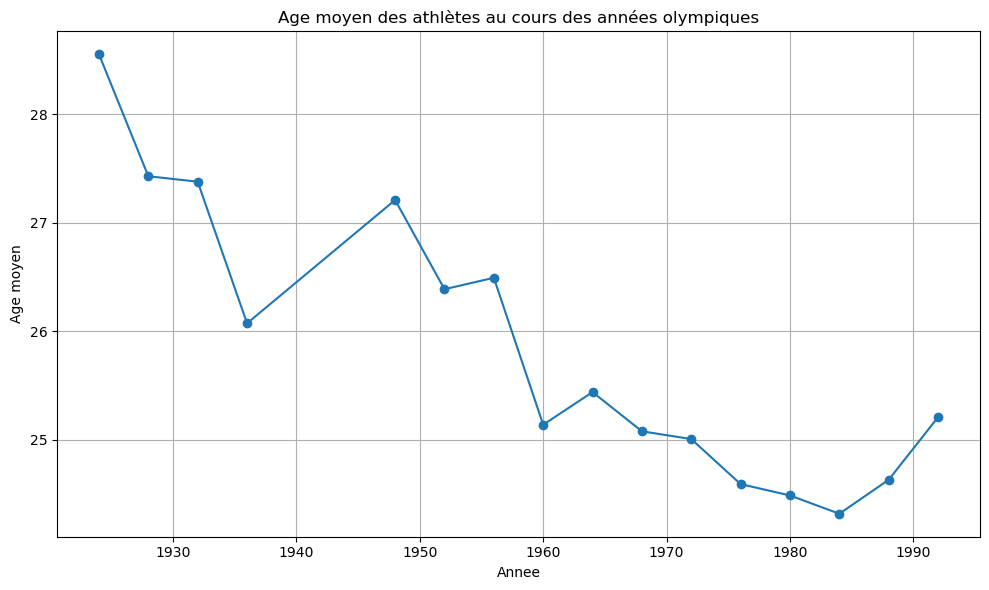

,OLYMPIC_ANNEE,AGE_MOYEN
0,1924,28.552486
1,1928,27.428333
2,1932,27.378049
3,1936,26.072375
4,1948,27.209139
5,1952,26.386926
6,1956,26.492170
7,1960,25.137411
8,1964,25.438606
9,1968,25.076963


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

query = """
SELECT AnneeHote as OLYMPIC_ANNEE , AVG(age) AS AGE_MOYEN
FROM (
    -- Pour les athlètes en équipe
    SELECT h.AnneeHote, (h.AnneeHote - EXTRACT(YEAR FROM a.DateNaissance)) AS age
    FROM ATHLETE a
    JOIN COMPOSITION_EQUIPE ce ON a.IdAthlete = ce.IdAthlete
    JOIN EQUIPE e ON ce.IdEquipe = e.IdEquipe
    JOIN PARTICIPATION_EQUIPE pe ON e.IdEquipe = pe.IdEquipe
    JOIN EVENEMENT ev ON pe.IdEvenement = ev.IdEvenement
    JOIN HOTE h ON ev.IdHote = h.IdHote
    WHERE h.AnneeHote <= 1992
    and SAISON = 'Winter'
    AND a.DateNaissance IS NOT NULL

    UNION ALL

    -- Pour les athlètes individuels
    SELECT h.AnneeHote, (h.AnneeHote - EXTRACT(YEAR FROM a.DateNaissance)) AS age
    FROM ATHLETE a
    JOIN PARTICIPATION_INDIVIDUELLE pi ON a.IdAthlete = pi.IdAthlete
    JOIN EVENEMENT ev ON pi.IdEvent = ev.IdEvenement
    JOIN HOTE h ON ev.IdHote = h.IdHote
    WHERE h.AnneeHote <= 1992
    and SAISON = 'Winter'
    AND a.DateNaissance IS NOT NULL
) combined
GROUP BY AnneeHote
ORDER BY AnneeHote
"""

try:
 
    cursor = conn.cursor()
    cursor.execute(query)
    
    columns = [col[0] for col in cursor.description]
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    
    if not df.empty:
    
        plt.figure(figsize=(10, 6))
        plt.plot(df['OLYMPIC_ANNEE'], df['AGE_MOYEN'], marker='o', linestyle='-')
        plt.title('Age moyen des athlètes au cours des années olympiques')
        plt.xlabel('Annee')
        plt.ylabel('Age moyen')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("data non trouvé")

except Exception as e:
    print(f"error：{str(e)}")

finally:

    if cursor:
        cursor.close()
        
        
AGE_MOY_ANNEE = requete_vers_dataframe(conn, query)
AGE_MOY_ANNEE


L'analyse de l'évolution de l'âge moyen des athlètes aux Jeux Olympiques d'hiver entre 1924 et 1992 peut être enrichie par une compréhension des contextes historiques et des événements mondiaux qui ont influencé cette période.

Années 1920-1940 :

    1924 (Chamonix) : Les premiers Jeux Olympiques d'hiver se déroulent dans une période de relative stabilité après la Première Guerre mondiale. Les athlètes étaient principalement amateurs, souvent plus âgés car le sport professionnel n'était pas aussi développé.

    1928 (Saint-Moritz) et 1932 (Lake Placid) : La Grande Dépression mondiale a affecté les financements et les ressources disponibles pour les athlètes. Cela a peut-être contribué à une légère baisse de l'âge moyen en raison de moins d'athlètes professionnels.
    
    1936 (Garmisch-Partenkirchen) : Avant la Seconde Guerre mondiale, il y a eu une légère baisse de l'âge moyen, possiblement en raison de l'augmentation de la participation de jeunes athlètes, alors que les sports d'hiver gagnent en popularité.

Période post-Seconde Guerre mondiale (1948-1960) :

    1948 (Saint-Moritz) : Les Jeux reprennent après la guerre avec une hausse temporaire de l'âge moyen, possiblement due au retour de nombreux athlètes plus âgés qui n'avaient pas eu la chance de participer pendant les années de conflit.
    
    1952 (Oslo) à 1960 (Squaw Valley) : Une tendance à la baisse se manifeste à mesure que les jeunes générations commencent à s'impliquer davantage dans les sports, soutenues par des infrastructures sportives améliorées et une meilleure nutrition.

Années 1960-1980 :

    1964 (Innsbruck) à 1980 (Lake Placid) : Cette période voit une professionnalisation croissante des sports d'hiver. Les progrès technologiques, l'amélioration des techniques d'entraînement et la popularité croissante des sports d'hiver attirent des athlètes plus jeunes, entraînant une diminution de l'âge moyen.

Années 1980-1992 :

    1984 (Sarajevo), 1988 (Calgary), 1992 (Albertville) : La Guerre froide influence la dynamique des Jeux, avec l'implication accrue des athlètes des blocs de l'Est et de l'Ouest. La tendance à la baisse de l'âge moyen continue avec des athlètes plus jeunes entrant dans la compétition grâce à des systèmes de formation d'élite, en particulier en Europe de l'Est.

    1989 : Chute du Mur de Berlin : Cet événement marque la fin de la Guerre froide, ouvrant de nouvelles opportunités pour les athlètes des pays de l'ex-Bloc de l'Est. 

Les Jeux de 1992 reflètent ce changement avec une légère hausse de l'âge moyen à mesure que des athlètes expérimentés des nouveaux pays participants se joignent à la compétition.

En résumé, l'évolution de l'âge moyen des athlètes olympiques d'hiver est étroitement liée à des contextes historiques clés, y compris les guerres mondiales, la professionnalisation du sport, les avancées technologiques et politiques mondiales telles que la fin de la Guerre froide. Ces facteurs ont contribué à une diversification et à un rajeunissement progressif des athlètes au fil du temps.

### e. Féminisation : nombre d’événements féminins, nombre d’athlètes femme (et tendance à long terme)

#### Le nombres d'athlètes femmes pour les JO d'hiver de 1992 est de 584.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

query = """
SELECT COUNT(DISTINCT a.IdAthlete) AS Nombre_Athletes_Femmes_W1992
FROM EVENEMENT e
JOIN HOTE h ON e.IdHote = h.IdHote
LEFT JOIN PARTICIPATION_INDIVIDUELLE pi ON e.IdEvenement = pi.IdEvent
LEFT JOIN PARTICIPATION_EQUIPE pe ON e.IdEvenement = pe.IdEvenement
LEFT JOIN COMPOSITION_EQUIPE ce ON pe.IdEquipe = ce.IdEquipe
JOIN ATHLETE a ON pi.IdAthlete = a.IdAthlete OR ce.IdAthlete = a.IdAthlete
WHERE h.LibelleHote = '1992 Winter Olympics' AND a.Genre = 'Female'
"""

nb_femmes = requete_vers_dataframe(conn, query)
nb_femmes


,NOMBRE_ATHLETES_FEMMES_W1992
0,584


#### Le nombres d'évenements féminins pour les JO d'hiver de 1992 est de 29.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

query = """
SELECT COUNT(DISTINCT e.IdEvenement) AS Nombre_Evenements_Feminins_W1992
FROM EVENEMENT e
JOIN HOTE h ON e.IdHote = h.IdHote
LEFT JOIN PARTICIPATION_INDIVIDUELLE pi ON e.IdEvenement = pi.IdEvent
LEFT JOIN PARTICIPATION_EQUIPE pe ON e.IdEvenement = pe.IdEvenement
LEFT JOIN COMPOSITION_EQUIPE ce ON pe.IdEquipe = ce.IdEquipe
LEFT JOIN ATHLETE a ON pi.IdAthlete = a.IdAthlete OR ce.IdAthlete = a.IdAthlete
WHERE h.LibelleHote = '1992 Winter Olympics' AND a.Genre = 'Female'
"""

nb_event_femmes = requete_vers_dataframe(conn, query)
nb_event_femmes


,NOMBRE_EVENEMENTS_FEMININS_W1992
0,29


#### Tendance des evenements féminin des JO d'hiver de 1992 et ses années précédentes : 

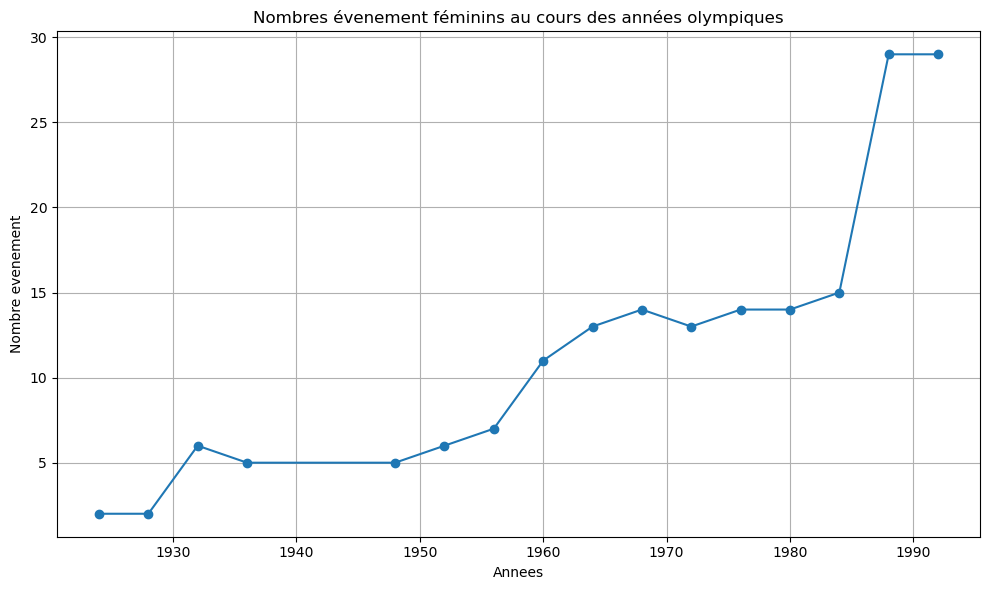

,ANNEE,NOMBRE_EVENEMENTS_FEMININS
0,1924,2
1,1928,2
2,1932,6
3,1936,5
4,1948,5
5,1952,6
6,1956,7
7,1960,11
8,1964,13
9,1968,14


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

query = """
SELECT h.AnneeHote as ANNEE, COUNT(DISTINCT e.IdEvenement) AS NOMBRE_EVENEMENTS_FEMININS
FROM EVENEMENT e
JOIN HOTE h ON e.IdHote = h.IdHote
LEFT JOIN PARTICIPATION_INDIVIDUELLE pi ON e.IdEvenement = pi.IdEvent
LEFT JOIN PARTICIPATION_EQUIPE pe ON e.IdEvenement = pe.IdEvenement
LEFT JOIN COMPOSITION_EQUIPE ce ON pe.IdEquipe = ce.IdEquipe
LEFT JOIN ATHLETE a1 ON pi.IdAthlete = a1.IdAthlete
LEFT JOIN ATHLETE a2 ON ce.IdAthlete = a2.IdAthlete
WHERE (a1.Genre = 'Female' OR a2.Genre = 'Female')
AND h.Saison = 'Winter'
AND h.AnneeHote <= 1992
GROUP BY h.AnneeHote
ORDER BY h.AnneeHote
"""


try:
 
    cursor = conn.cursor()
    cursor.execute(query)
    
    columns = [col[0] for col in cursor.description]
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    
    if not df.empty:
    
        plt.figure(figsize=(10, 6))
        plt.plot(df['ANNEE'], df['NOMBRE_EVENEMENTS_FEMININS'], marker='o', linestyle='-')
        plt.title('Nombres évenement féminins au cours des années olympiques')
        plt.xlabel('Annees')
        plt.ylabel('Nombre evenement')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("data non trouvé")

except Exception as e:
    print(f"error：{str(e)}")

finally:

    if cursor:
        cursor.close()
        

nb_event_femmes_ann = requete_vers_dataframe(conn, query)
nb_event_femmes_ann


L'analyse des données sur le nombre d'événements féminins aux Jeux Olympiques d'hiver de 1924 à 1992 révèle des tendances intéressantes et significatives quant à l'évolution de la participation féminine dans les sports d'hiver. 

Observations des Données

Années 1924-1956 :

    1924-1928 : Le nombre d'événements féminins commence modestement avec seulement 2 événements en 1924 et 1928.
    1932 : Une augmentation notable se produit avec 6 événements féminins.
    1936-1956 : Le nombre d'événements reste relativement stable, avec une légère augmentation à 7 événements en 1956.

Années 1960-1984 :

    1960-1968 : La période voit une augmentation significative du nombre d'événements féminins, passant de 11 en 1960 à 14 en 1968.
    1972-1984 : Le nombre d'événements féminins oscille entre 13 et 15, montrant une certaine stagnation.

Années 1988-1992 :

    1988-1992 : Une augmentation spectaculaire se produit, le nombre d'événements féminins bondissant à 29.

Explications Potentielles des Changements

    Premières Années (1924-1956) :

    Contexte socioculturel : Les premières années des Jeux Olympiques d'hiver se déroulent dans un contexte où les opportunités sportives pour les femmes étaient limitées. Les normes sociales et les attentes traditionnelles en matière de genre restreignaient la participation féminine.
    Infrastructures et reconnaissance : Le manque d'infrastructures et de reconnaissance pour les sports féminins a également contribué au faible nombre d'événements.

Expansion Progressive (1960-1984) :

    Mouvement pour l'égalité des sexes : La période des années 1960 et 1970 est marquée par des mouvements mondiaux pour les droits des femmes et l'égalité des sexes. Ces mouvements ont influencé les politiques sportives internationales, conduisant à une augmentation progressive des événements féminins.
    Institutionnalisation du sport féminin : La reconnaissance croissante des sports féminins par les fédérations internationales et le CIO (Comité International Olympique) a permis d'intégrer davantage d'événements pour les femmes.

Augmentation Spectaculaire (1988-1992) :

    Politiques du CIO : Le CIO a commencé à adopter des politiques plus inclusives et à promouvoir activement la participation des femmes aux Jeux Olympiques. Cela est visible par l'augmentation spectaculaire du nombre d'événements féminins en 1988.

    Changements géopolitiques : La fin de la Guerre froide et l'inclusion de nouveaux pays aux Jeux Olympiques ont peut-être contribué à une diversification des sports et à une augmentation des événements féminins.
    
    Soutien et sponsoring : Un soutien accru des sponsors et des gouvernements pour les sports féminins a également joué un rôle crucial dans l'augmentation du nombre d'événements.


Conclusions et Implications

    Progrès de l'égalité des sexes : L'augmentation du nombre d'événements féminins aux Jeux Olympiques d'hiver reflète les progrès réalisés en matière d'égalité des sexes dans le sport. Cela montre une reconnaissance accrue des capacités et de l'importance des athlètes féminines.

    Impact des politiques sportives : Les changements dans les politiques du CIO et les efforts pour promouvoir l'inclusion ont eu un impact direct sur l'augmentation de la participation féminine.

    Perspectives d'avenir : La tendance à l'augmentation des événements féminins devrait se poursuivre, avec une plus grande diversité de sports et une participation encore plus large des femmes, reflétant des sociétés de plus en plus inclusives et égalitaires.

    En somme, les données montrent une évolution positive et significative vers une plus grande inclusion des femmes dans les Jeux Olympiques d'hiver, soulignant l'importance des politiques progressistes et des mouvements pour l'égalité des sexes.







#### Tendance du nombres d'athlétes féminins des JO d'hiver de 1992 et ses années précédentes

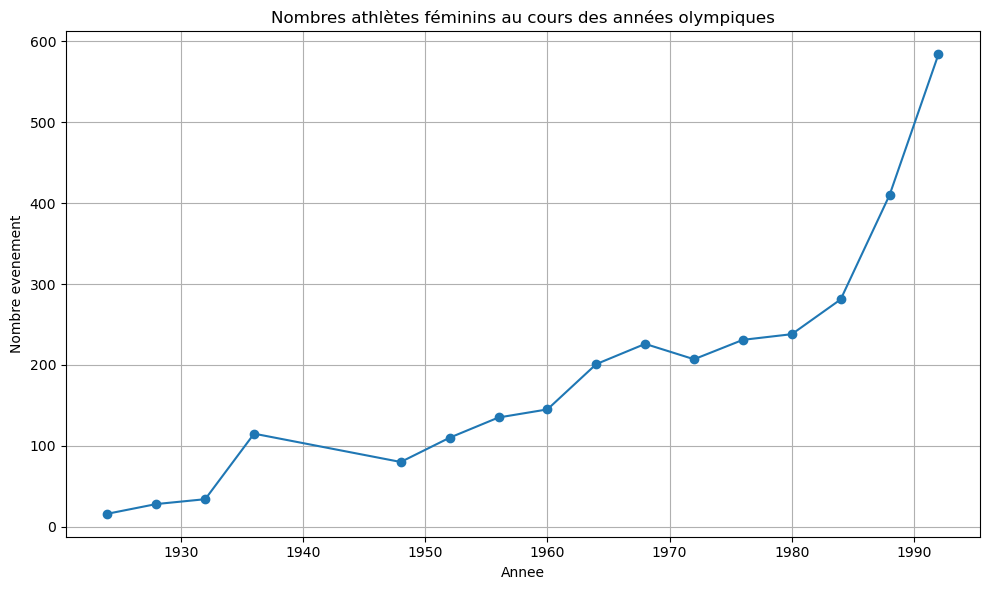

,ANNEE,NOMBRE_ATHLETES_FEMMES
0,1924,16
1,1928,28
2,1932,34
3,1936,115
4,1948,80
5,1952,110
6,1956,135
7,1960,145
8,1964,201
9,1968,226


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

query = """
SELECT h.AnneeHote as ANNEE, COUNT(DISTINCT a.IdAthlete) AS NOMBRE_ATHLETES_FEMMES
FROM EVENEMENT e
JOIN HOTE h ON e.IdHote = h.IdHote
LEFT JOIN PARTICIPATION_INDIVIDUELLE pi ON e.IdEvenement = pi.IdEvent
LEFT JOIN PARTICIPATION_EQUIPE pe ON e.IdEvenement = pe.IdEvenement
LEFT JOIN COMPOSITION_EQUIPE ce ON pe.IdEquipe = ce.IdEquipe
LEFT JOIN ATHLETE a1 ON pi.IdAthlete = a1.IdAthlete
LEFT JOIN ATHLETE a2 ON ce.IdAthlete = a2.IdAthlete
LEFT JOIN ATHLETE a ON a.IdAthlete = COALESCE(a1.IdAthlete, a2.IdAthlete)
WHERE (a1.Genre = 'Female' OR a2.Genre = 'Female')
AND h.Saison = 'Winter'
AND h.AnneeHote <= 1992
GROUP BY h.AnneeHote
ORDER BY h.AnneeHote
"""


try:
 
    cursor = conn.cursor()
    cursor.execute(query)
    
    columns = [col[0] for col in cursor.description]
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    
    if not df.empty:
    
        plt.figure(figsize=(10, 6))
        plt.plot(df['ANNEE'], df['NOMBRE_ATHLETES_FEMMES'], marker='o', linestyle='-')
        plt.title('Nombres athlètes féminins au cours des années olympiques')
        plt.xlabel('Annee')
        plt.ylabel('Nombre evenement')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("data non trouvé")

except Exception as e:
    print(f"error：{str(e)}")

finally:

    if cursor:
        cursor.close()

nb_event_femmes_ann = requete_vers_dataframe(conn, query)
nb_event_femmes_ann


Observations des Données

Premières Années (1924 - 1948) :

    Le nombre de femmes athlètes était très faible au début. En 1924, il n'y avait que 16 femmes athlètes.
    Il y a eu une augmentation progressive de la participation jusqu'en 1936, où le nombre a atteint 115.
    La diminution en 1948 à 80 participantes peut être attribuée aux conséquences de la Seconde Guerre mondiale, qui ont probablement affecté les niveaux de participation et l'organisation des Jeux Olympiques.

Mi-siècle (1952 - 1976) :

    À partir de 1952, il y a eu une augmentation constante du nombre de femmes athlètes, indiquant des opportunités croissantes et une acceptation des femmes dans les sports de compétition.
    En 1964, le nombre a dépassé les 200 participantes, montrant une amélioration significative par rapport à l'avant-guerre.
    La tendance à l'augmentation de la participation s'est poursuivie, bien qu'il y ait eu de légères fluctuations, comme la légère diminution en 1972 et 1980.

Années Récentes (1980 - 1992) :

    La croissance la plus significative peut être observée pendant cette période. À partir de 1984, il y a eu une augmentation substantielle du nombre de femmes athlètes.
    En 1988, le nombre a augmenté à 410, et il a atteint un sommet de 584 en 1992, le plus élevé dans l'ensemble des données fournies.

Explications Potentielles des Tendances

Changements Sociaux et Culturels :

    Au fil des décennies, les attitudes sociales envers les femmes dans le sport ont évolué de manière significative. Il y a eu une réduction progressive des barrières de genre, conduisant à une participation accrue des femmes dans les sports de compétition.
    Les mouvements féministes des années 1960 et 1970 ont probablement contribué à une plus grande acceptation et encouragement des femmes athlètes.

Changements Politiques et Organisationnels :

    Le Comité International Olympique (CIO) et diverses organisations sportives nationales ont de plus en plus soutenu l'égalité des sexes dans le sport.
    L'introduction de nouveaux événements et disciplines spécifiquement pour les femmes aux Jeux Olympiques d'hiver a également pu contribuer à l'augmentation des chiffres.

Augmentation de la Participation Mondiale :

    À mesure que de plus en plus de pays ont commencé à participer aux Jeux Olympiques d'hiver, il y a eu une augmentation correspondante du nombre de femmes athlètes.
    La diffusion du mouvement olympique dans de nouvelles régions et pays avec une tradition de participation sportive féminine a probablement ajouté aux chiffres.

Amélioration de l'Entraînement et des Installations :

    Les avancées dans la science du sport, de meilleures installations d'entraînement et plus d'opportunités pour les femmes de s'entraîner à un haut niveau ont probablement joué un rôle.
    La visibilité accrue des athlètes féminines de haut niveau servant de modèles peut avoir encouragé plus de femmes à pratiquer des sports.

Deductions des Résultats

Croissance Continue :

    Les données montrent une tendance claire à la croissance continue du nombre de femmes athlètes aux Jeux Olympiques d'hiver. Cela reflète des changements sociétaux plus larges vers l'égalité des sexes dans le sport et au-delà.

Impact des Événements Historiques :

    Les événements historiques, comme la Seconde Guerre mondiale, ont eu un impact notable sur les niveaux de participation, avec une baisse significative en 1948.

Augmentation Rapide Après 1980 :

    L'augmentation rapide de la participation des femmes athlètes à partir des années 1980 indique un changement significatif, probablement dû aux changements de politique, aux mouvements sociaux et à l'augmentation de la participation mondiale.

Conclusion

    La tendance du nombre de femmes athlètes aux Jeux Olympiques d'hiver de 1924 à 1992 montre une trajectoire positive vers l'égalité des sexes dans le sport. Cette croissance peut être attribuée à une combinaison de facteurs sociaux, culturels et organisationnels qui ont progressivement créé un environnement plus inclusif pour les femmes dans les sports de compétition. L'augmentation significative du nombre de femmes athlètes au cours des dernières années est particulièrement encourageante et souligne les progrès réalisés dans la promotion de l'égalité des sexes dans le domaine du sport international.

## 3.Performance de l'équipe de notre choix

### Allemagne

### Evolution du nombres de médailles pour l'Allemagne

/tmp/ipykernel_512/1044462890.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Index(['ANNEE', 'NOMBRE_MEDAILLES'], dtype='object')


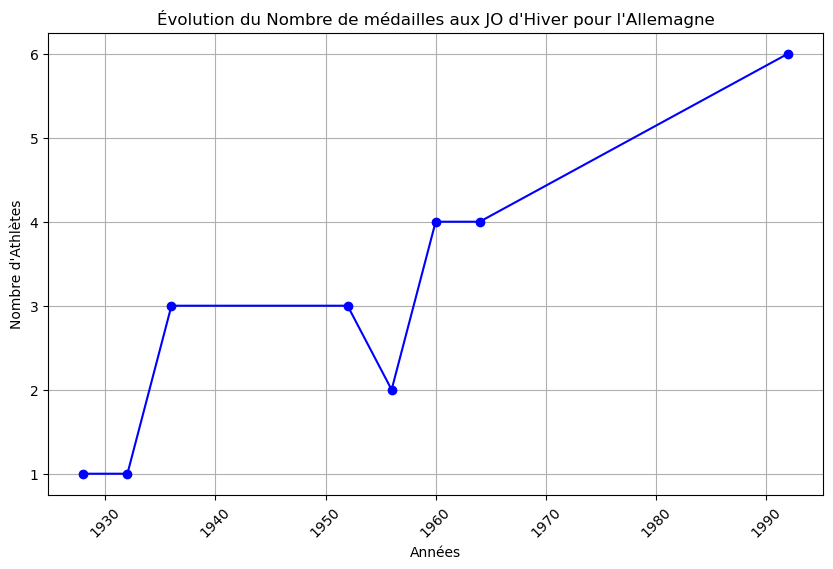

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import cx_Oracle


query = """
SELECT h.AnneeHote as ANNEE, 
       COUNT(DISTINCT pi.Medaille) + COUNT(DISTINCT pe.Medaille) AS NOMBRE_MEDAILLES
FROM HOTE h
JOIN EVENEMENT e ON h.IdHote = e.IdHote
LEFT JOIN PARTICIPATION_INDIVIDUELLE pi ON e.IdEvenement = pi.IdEvent
LEFT JOIN PARTICIPATION_EQUIPE pe ON e.IdEvenement = pe.IdEvenement
LEFT JOIN COMPOSITION_EQUIPE ce ON pe.IdEquipe = ce.IdEquipe
LEFT JOIN ATHLETE a ON a.IdAthlete = pi.IdAthlete OR a.IdAthlete = ce.IdAthlete
LEFT JOIN EQUIPE eq ON pe.IdEquipe = eq.IdEquipe
LEFT JOIN NOC n ON (pi.NOC = n.CodeNOC OR eq.NOC = n.CodeNOC)
WHERE h.AnneeHote <= 1992 AND h.Saison = 'Winter' AND n.CodeNOC = 'GER' AND (pi.Medaille IS NOT NULL OR pe.Medaille IS NOT NULL)
GROUP BY h.AnneeHote
"""



df = pd.read_sql(query, conn)


print(df.columns)

plt.figure(figsize=(10, 6))
plt.plot(df['ANNEE'], df["NOMBRE_MEDAILLES"], marker='o', linestyle='-', color='b')
plt.title('Évolution du Nombre de médailles aux JO d\'Hiver pour l\'Allemagne')
plt.xlabel('Années')
plt.ylabel('Nombre d\'Athlètes')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

Analyse des tendances

1928 à 1932 : L'Allemagne a remporté une seule médaille aux Jeux de 1928 et de 1932, ce qui indique une performance stable mais faible.

1932 à 1936 : En 1936, le nombre de médailles a triplé, passant de 1 à 3. Cela pourrait être attribué à une meilleure préparation et à une plus grande participation.

1936 à 1952 : Après la Seconde Guerre mondiale, l'Allemagne a remporté de nouveau 3 médailles en 1952, montrant une reprise de ses performances sportives.

1952 à 1956 : Une légère diminution à 2 médailles en 1956, ce qui pourrait être dû à divers facteurs, comme la concurrence accrue ou des changements dans la préparation des athlètes.

1956 à 1960 : En 1960, l'Allemagne a remporté 4 médailles, marquant une amélioration.

1960 à 1964 : Le nombre de médailles est resté constant à 4 en 1964, indiquant une stabilité dans les performances.

1964 à 1992 : Une augmentation notable à 6 médailles en 1992, après la réunification de l'Allemagne, ce qui reflète une amélioration significative des performances sportives.

Conclusion
L'évolution du nombre de médailles pour l'Allemagne aux Jeux Olympiques d'hiver montre une tendance générale à l'augmentation, avec quelques fluctuations. Les années de guerre et d'après-guerre ont eu un impact, mais à partir de 1960, une tendance positive est observable. L'augmentation significative en 1992 peut être attribuée à la réunification de l'Allemagne, combinant les talents de l'Allemagne de l'Est et de l'Ouest.

### Evolution du nombres d'athlètes pour l'Allemagne

/tmp/ipykernel_512/1775500798.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Index(['ANNEE', 'NOMBRE_ATHLETES'], dtype='object')


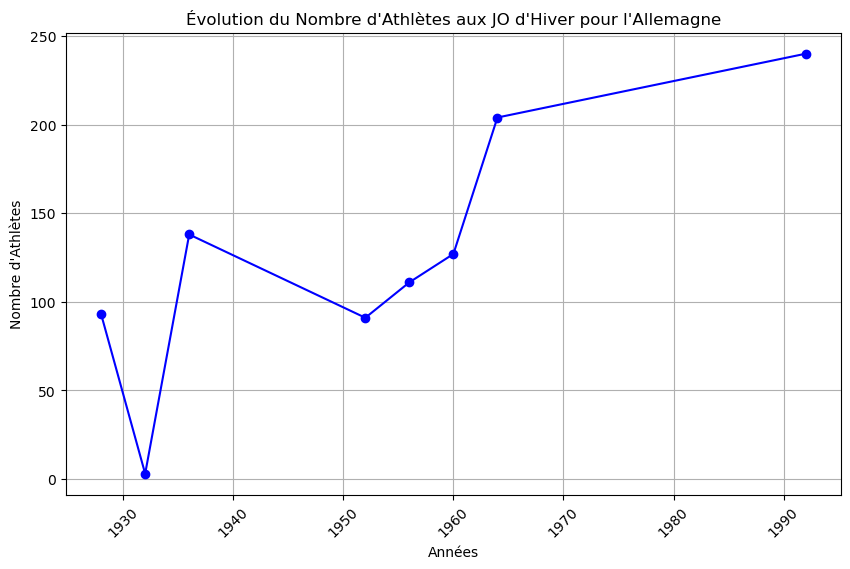

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import cx_Oracle


query = """
SELECT h.AnneeHote as ANNEE, 
       COUNT(DISTINCT a.IdAthlete) AS NOMBRE_ATHLETES
FROM HOTE h
JOIN EVENEMENT e ON h.IdHote = e.IdHote
LEFT JOIN PARTICIPATION_INDIVIDUELLE pi ON e.IdEvenement = pi.IdEvent
LEFT JOIN COMPOSITION_EQUIPE ce ON e.IdEvenement = ce.IdEquipe
LEFT JOIN ATHLETE a ON a.IdAthlete = pi.IdAthlete OR a.IdAthlete = ce.IdAthlete
LEFT JOIN EQUIPE eq ON ce.IdEquipe = eq.IdEquipe
LEFT JOIN NOC n ON (pi.NOC = n.CodeNOC OR eq.NOC = n.CodeNOC)
WHERE h.AnneeHote <= 1992 AND h.Saison = 'Winter' AND n.CodeNOC = 'GER'
GROUP BY h.AnneeHote
"""


df = pd.read_sql(query, conn)


print(df.columns)

plt.figure(figsize=(10, 6))
plt.plot(df['ANNEE'], df["NOMBRE_ATHLETES"], marker='o', linestyle='-', color='b')
plt.title('Évolution du Nombre d\'Athlètes aux JO d\'Hiver pour l\'Allemagne')
plt.xlabel('Années')
plt.ylabel('Nombre d\'Athlètes')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

Analyse des tendances


1928 à 1932 : Une forte diminution du nombre d'athlètes, passant de 93 à seulement 3. Cela pourrait être dû à des circonstances spécifiques de cette période, comme des problèmes économiques ou politiques, ou des décisions internes concernant la participation aux jeux.

1932 à 1936 : Une augmentation drastique à 138 athlètes en 1936, marquant un retour significatif de la participation allemande.

1936 à 1952 : Une baisse à 91 athlètes en 1952, mais cette année marque le retour après la Seconde Guerre mondiale et la division de l'Allemagne.

1952 à 1964 : Une tendance à la hausse régulière, avec une augmentation progressive du nombre d'athlètes chaque année : 91 en 1952, 111 en 1956, 127 en 1960, et 204 en 1964. Cette période reflète une stabilité et une croissance dans le sport en Allemagne de l'Ouest.

1964 à 1992 : Une augmentation à 240 athlètes en 1992. Il est important de noter que 1992 est après la réunification de l'Allemagne (1990), ce qui explique l'augmentation significative.

Conclusion
L'évolution du nombre d'athlètes allemands aux Jeux Olympiques d'hiver montre des fluctuations importantes, influencées par des événements historiques majeurs tels que la Seconde Guerre mondiale et la réunification allemande. Après la guerre, il y a une croissance constante du nombre d'athlètes, culminant en 1992 avec la réunification.